In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from pprint import pprint
%matplotlib inline


In [21]:
#%pip install citipy

In [22]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [23]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


639

In [24]:
cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
#Parameter for the API call
api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
parameters={'appid':api_key_weather, "units":"imperial"}
results = []
#contentType ='json'
#loop through the list of cities and perform a request for weather data for each city
for city in cities:
    parameters['q']=city
    response = requests.get(cityurl, params=parameters)
    weatherjson=response.json()
    if weatherjson['cod']==200:
        results.append(response)
    else:
        if weatherjson['cod']==404:
            print('Data not available')

time.sleep(5)
#display(results)

In [30]:
#set up list to hold response info
results = []
counter = 0
cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
parameters={'appid':api_key_weather, "units":"imperial"}


for city in cities:
    parameters['q']=city
    response = requests.get(cityurl, params=parameters).json()

    #try/except statement to handle errors when city is not found on openweather site
    try:
        #create dictionary
        city_data = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        results.append(city_data)
        counter = counter + 1
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
    except:
        print("Missing city | " + city)
#city_weather

1 City Name: Butaritari / ID:2110227
2 City Name: Mataura / ID:6201424
3 City Name: Chui / ID:3443061
4 City Name: Kaitangata / ID:2208248
5 City Name: Norman Wells / ID:6089245
6 City Name: Coolum Beach / ID:2170581
7 City Name: Antigonish / ID:5886182
8 City Name: San Patricio / ID:4726521
9 City Name: Ivybridge / ID:2645988
10 City Name: Albany / ID:5106841
11 City Name: Nikolskoye / ID:546105
12 City Name: Tiksi / ID:2015306
Missing city...skipping | attawapiskat
13 City Name: Cabo San Lucas / ID:3985710
14 City Name: Caxito / ID:2242001
15 City Name: Waddān / ID:2209055
16 City Name: Bridlington / ID:2654728
17 City Name: Vytegra / ID:469960
Missing city...skipping | taolanaro
18 City Name: Bluff / ID:2206939
19 City Name: Tiznit Province / ID:2527087
20 City Name: Laas / ID:3175096
Missing city...skipping | meyungs
21 City Name: Katsuura / ID:2112309
22 City Name: Saskylakh / ID:2017155
23 City Name: Pathein / ID:1328421
24 City Name: Constitución / ID:3893726
25 City Name: Mahéb

In [28]:

# latitude=[response.get('coord').get('lat') for response in results]
# longitude=[response.get('coord').get('lon') for response in results]
# Country=[response.get('sys').get('country') for response in results]
# Date=[response.get('dt') for response in results]
# Temperature=[response.get('main').get('temp_max') for response in results]
# Humidity=[response.get('main').get('humidity') for response in results]
# Cloudiness=[response.get('clouds').get('all') for response in results]
# Wind_Speed=[response.get('wind').get('speed') for response in results]
# city=[response.get('name') for response in results]


In [35]:
# # Create a DataFrame.
city_df = pd.DataFrame(results)
city_df
# write to output file
city_df.to_csv("weatherhome.csv", index=False)                      

In [36]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.30,75,0,11.52,KI,1613099819
1,Mataura,-46.1927,168.8643,60.01,69,0,8.99,NZ,1613099819
2,Chui,-33.6971,-53.4616,70.34,91,100,11.88,UY,1613099819
3,Kaitangata,-46.2817,169.8464,60.01,66,2,11.01,NZ,1613099819
4,Norman Wells,65.2820,-126.8329,-11.20,77,20,2.30,CA,1613099819
...,...,...,...,...,...,...,...,...,...
573,Cuiluan,47.7200,128.6480,31.86,93,83,8.52,CN,1613099880
574,Olivenza,38.6832,-7.1030,55.00,91,96,4.00,ES,1613099881
575,Laguna,38.4210,-121.4238,53.01,87,90,8.05,US,1613099881
576,Ulladulla,-35.3500,150.4667,82.99,61,0,6.91,AU,1613099881


The scatter plot vvvvvv


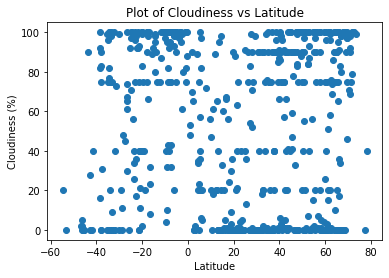

In [44]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.title('Plot of Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


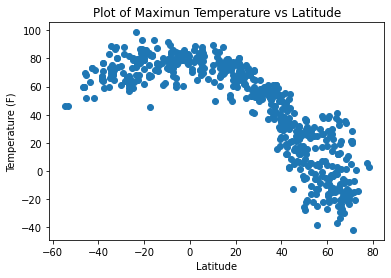

In [45]:
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.title('Plot of Maximun Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


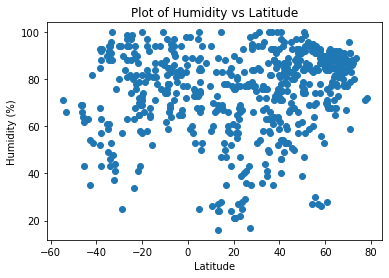

In [46]:
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.title('Plot of Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


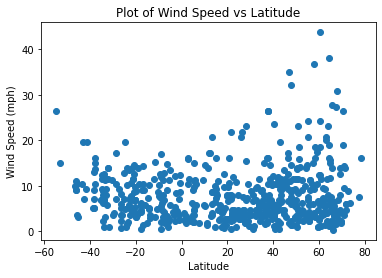

In [47]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.title('Plot of Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print("The scatter plot vvvvvv")

In [41]:
southhemisp=city_df.loc[city_df["Lat"]<0]
southhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mataura,-46.1927,168.8643,60.01,69,0,8.99,NZ,1613099819
2,Chui,-33.6971,-53.4616,70.34,91,100,11.88,UY,1613099819
3,Kaitangata,-46.2817,169.8464,60.01,66,2,11.01,NZ,1613099819
5,Coolum Beach,-26.5333,153.1000,82.00,63,67,5.99,AU,1613099819
13,Caxito,-8.5785,13.6643,80.60,78,75,4.61,AO,1613099820
...,...,...,...,...,...,...,...,...,...
552,Mgandu,-5.9500,34.1333,59.88,97,100,2.08,TZ,1613099878
556,Santa Cruz de la Sierra,-17.8000,-63.1667,68.00,94,90,4.61,BO,1613099703
564,Curaçá,-8.9903,-39.9094,75.09,76,10,16.89,BR,1613099880
569,Beloha,-25.1667,45.0500,73.44,82,92,7.05,MG,1613099880


In [ ]:
# Run linear regression on each relationship: 

In [42]:
northhemisp=city_df.loc[city_df["Lat"]>0]
northhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.30,75,0,11.52,KI,1613099819
4,Norman Wells,65.2820,-126.8329,-11.20,77,20,2.30,CA,1613099819
6,Antigonish,45.6169,-61.9986,15.01,80,47,3.00,CA,1613099820
7,San Patricio,28.0170,-97.5169,41.00,93,90,6.91,US,1613099820
8,Ivybridge,50.3904,-3.9191,37.00,79,100,5.01,GB,1613099820
...,...,...,...,...,...,...,...,...,...
572,Bay Roberts,47.5999,-53.2648,23.00,89,100,11.01,CA,1613099880
573,Cuiluan,47.7200,128.6480,31.86,93,83,8.52,CN,1613099880
574,Olivenza,38.6832,-7.1030,55.00,91,96,4.00,ES,1613099881
575,Laguna,38.4210,-121.4238,53.01,87,90,8.05,US,1613099881


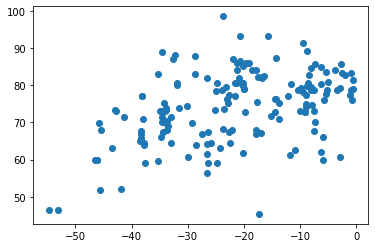

In [34]:

plt.scatter(southhemisp["Lat"], southhemisp["Max Temp"])

In [ ]:
# Run linear regression on each relationship: 

#Northen Hemisphere- Temperature(F) vs. Latitude
#Southern Hemisphere - Temperature(F) vs. Latitude
#Northen Hemisphere- Humidity(%) vs. Latitude
#Southern Hemisphere - Humidity(%) vs. Latitude
#Northen Hemisphere- Cloudiness(%) vs. Latitude
#Southern Hemisphere - Cloudiness(%) vs. Latitude
#Northen Hemisphere- wind Speed(mph) vs. Latitude
#Southern Hemisphere - wind Speed(mph) vs. Latitude